In [91]:

import numpy as np 
import pandas as pd 

import os
print(os.listdir("../input"))



['GCP-Coupons-Instructions.rtf', 'train.csv', 'sample_submission.csv', 'test.csv']


In [92]:
train = pd.read_csv("../input/train.csv", nrows = 1000000)
test = pd.read_csv("../input/test.csv")
train.columns


Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [93]:
train=train[(train.pickup_longitude<=90)&(train.pickup_longitude>=-90)]

In [94]:
train=train[(train.pickup_latitude<=90)&(train.pickup_latitude>=-90)]
train=train[(train.pickup_longitude<=90)&(train.pickup_longitude>=-90)]

In [95]:
train=train[(train.passenger_count<8)]
train=train[(train.pickup_latitude<=90)&(train.pickup_latitude>=-90)]
train=train[(train.pickup_longitude<=90)&(train.pickup_longitude>=-90)]

In [96]:
train.long=(train.pickup_longitude-train.dropoff_longitude)
train.lat=(train.pickup_latitude-train.dropoff_latitude)
train.long.head()
features=['long','lat']
train.columns
long=train.long.to_frame()
lat=train.lat.to_frame()
lat.index

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            999990, 999991, 999992, 999993, 999994, 999995, 999996, 999997,
            999998, 999999],
           dtype='int64', length=999970)

In [97]:
x_train=pd.merge(long,lat,on=lat.index)
y_train=train.fare_amount
x_train.columns=['Index','long','lat']

In [98]:
x_train.long=x_train.long.abs()
x_train.lat=x_train.lat.abs()
x_train.head()

,Index,long,lat
0,0,0.002701,0.009041
1,1,0.036780,0.070701
2,2,0.008504,0.010708
3,3,0.004437,0.024949
4,4,0.011440,0.015754


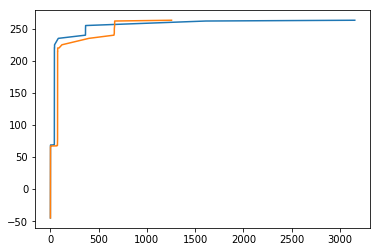

In [99]:
import matplotlib.pyplot as plt
plt.plot(x_train.lat.sort_values(),y_train.sort_values())
plt.plot(x_train.long.sort_values(),y_train.sort_values())

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
type(y_train)

pandas.core.series.Series

In [101]:
log=LogisticRegression()





In [102]:
x_train.columns

Index(['Index', 'long', 'lat'], dtype='object')

In [103]:
y_train=y_train.to_frame()

In [104]:
train=pd.merge(x_train,y_train, on=x_train.index)
train=train.dropna()

In [105]:

x_train=train[['long','lat']]
y_train=np.array(train.fare_amount)

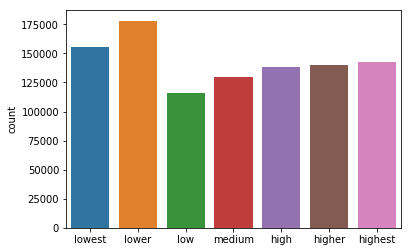

In [106]:
y_traincat=pd.qcut(y_train,7,labels=['lowest','lower','low','medium','high','higher','highest'])
sns.countplot(y_traincat)

In [107]:
y_traincat=pd.cut(y_train,7,labels=['lowest','lower','low','medium','high','higher','highest'])

log.fit(x_train,y_traincat)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [108]:
log.score(x_train,y_traincat)

0.9583523340933637

In [109]:
test=test[(test.passenger_count<8)]
test=test[(test.pickup_latitude<=90)&(test.pickup_latitude>=-90)]
test=test[(test.pickup_longitude<=90)&(test.pickup_longitude>=-90)]

In [110]:
test.long=(test.pickup_longitude-test.dropoff_longitude)
test.lat=(test.pickup_latitude-test.dropoff_latitude)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [111]:
long=train.long.to_frame()
lat=train.lat.to_frame()
x_test=pd.merge(long,lat, on=lat.index)
x_test.head()
x_test.columns=['drop','long','lat']
x_test.columns

Index(['drop', 'long', 'lat'], dtype='object')

In [112]:
x_test=x_test.drop('drop',axis=1)

In [113]:
x_test.head()

,long,lat
0,0.002701,0.009041
1,0.036780,0.070701
2,0.008504,0.010708
3,0.004437,0.024949
4,0.011440,0.015754


In [114]:
predicted=log.predict(x_test)

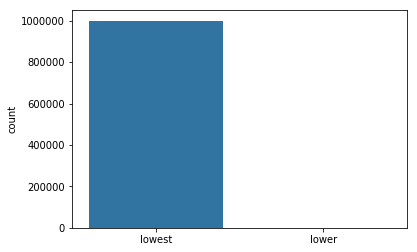

In [115]:
sns.countplot(predicted)

In [116]:
predicted=pd.DataFrame(predicted)

In [117]:
predicted.columns=['price']

In [119]:
predicted.groupby('price').size()


price
lower         10
lowest    999950
dtype: int64